In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
def logistic_regression(X_train, Y_train):
    # creating LogisticRegression object
    log_reg = LogisticRegression(random_state=0)

    # training the model
    log_reg.fit(X_train, Y_train)

    # printing the training accuracy
    print(f"logistic regression training accuracy = {log_reg.score(X_train, Y_train)}")

    log_reg_pickle_file = open("logistic_regression_pickle", "wb")
    pickle.dump(log_reg, log_reg_pickle_file)
    return log_reg

In [3]:
def decision_tree(X_train, Y_train):
    # creating DecisionTreeClassifier object
    dec_tree = DecisionTreeClassifier(random_state=0)

    # training the model
    dec_tree.fit(X_train, Y_train)

    # printing the training accuracy
    print(f"decision tree accuracy = {dec_tree.score(X_train, Y_train)}")

    dec_tree_pickle_file = open("decision_tree_pickle", "wb")
    pickle.dump(dec_tree, dec_tree_pickle_file)
    return dec_tree

In [4]:
def random_forest(X_train, Y_train):
    # creating DecisionTreeClassifier object
    ran_for = RandomForestClassifier(random_state=0)

    # training the model
    ran_for.fit(X_train, Y_train)

    # printing the training accuracy
    print(f"random forest training accuracy = {ran_for.score(X_train, Y_train)}")

    ran_for_pickle_file = open("random_forest_pickle", "wb")
    pickle.dump(ran_for, ran_for_pickle_file)
    return ran_for

In [7]:
df = pd.read_csv("G:/myProjects/breast-cancer-detection/dataset.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [8]:
# Step 1: Open the file in your python notebook, print first 5 rows of the dataset 
# and mention what are the dependent and independent variables in the Data.
# 1. printing the first 5 rows of the dataset
# 2. diagnosis is dependent variable and all the others are independent variables
print(df.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  sm

In [9]:
# Step 2: Find the statistical parameters of the Data that you have
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [10]:
# Step 3: Find the shape of the Dataset in hand.
# There are 569 rows and 33 columns in the dataset 
print(f"The shape of the dataset is {df.shape}")

The shape of the dataset is (569, 33)


In [38]:
# Step 4: Find missing values from the Dataset.
# There is 1 extra Unnamed column which has 569 null values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [15]:
# removing the missing values
df = df.loc[:, :'fractal_dimension_worst']
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [17]:
# Step 5: Find the value count of B(Benign) and M(Malignant) cancer cells in the column "diagnosis"¶
print(df['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [18]:
# Encoding the diagnosis values
diagnosis_label_encoder = LabelEncoder()

# encoding the B and M values
df['diagnosis'] = diagnosis_label_encoder.fit_transform(df['diagnosis'])

# decoding the values
df['diagnosis'] = diagnosis_label_encoder.inverse_transform(df['diagnosis'])

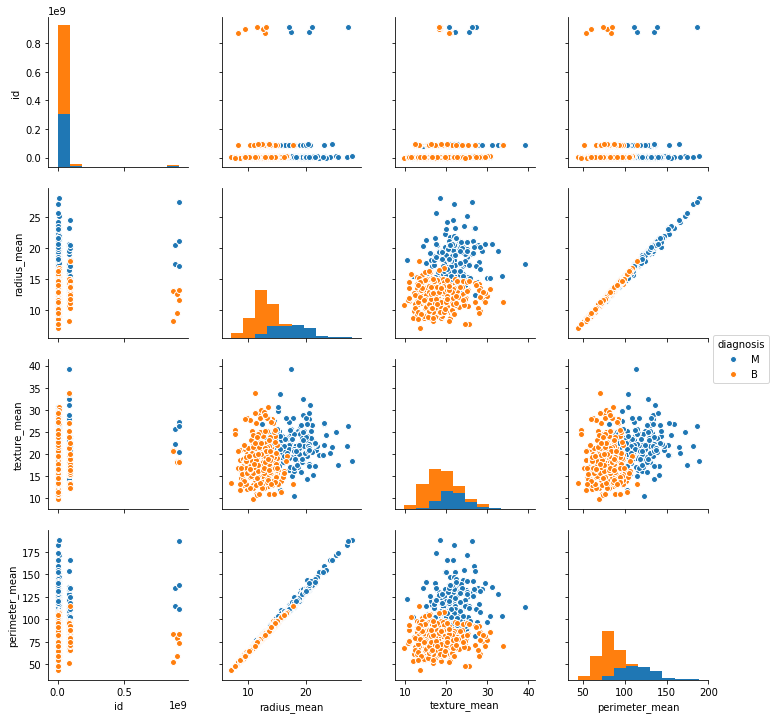

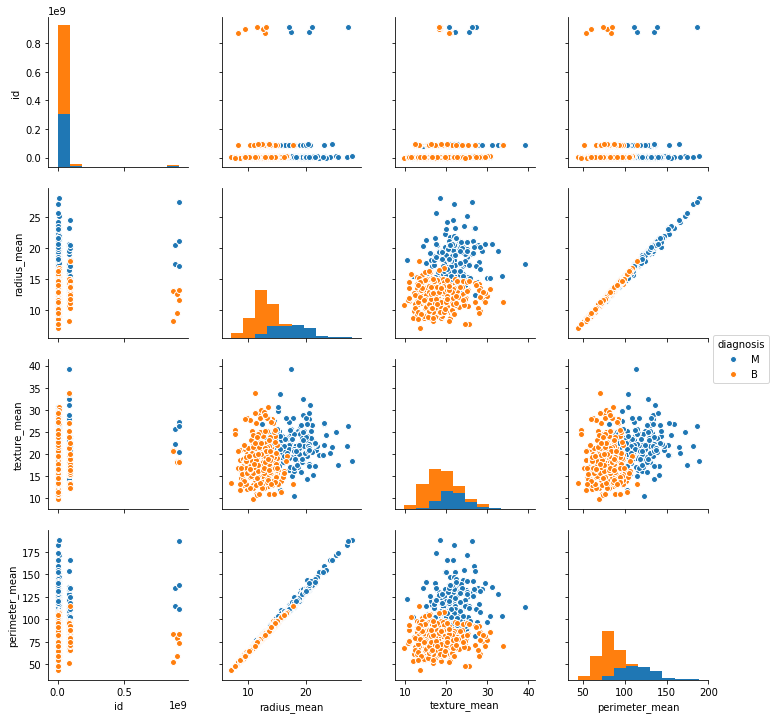

In [20]:
# Step 6: Creating a pairplot and mention the findings
df1 = df.loc[:, 'id' : 'perimeter_mean']
sns.pairplot(df1, hue='diagnosis')
plt.show()

In [21]:
# Step 7: Create a correlation matrix and mention strongly, weakly and negatively correlated quantities.
print(df.corr())

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

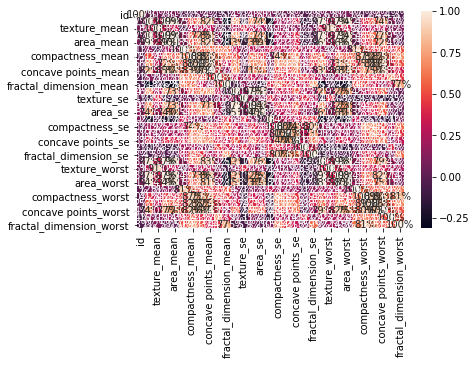

In [22]:
# Step 8: Create a heatmap of the correlated features (helps in visualization)
sns.heatmap(df.corr(), annot=True, fmt="0.0%")
plt.show()

In [23]:
# encoding the values
df['diagnosis'] = diagnosis_label_encoder.fit_transform(df['diagnosis'])

# Seperating the dependent and independent variables
X = df.iloc[:, 2:32]
Y = df.iloc[:, 1]

In [24]:
# splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [25]:
# Q1: Now, there is a small homeowrk for statistics wherein you have to read about the parameteres, define them in brief and write about two main types of distributions:
# 1. Gaussian distribution
# Gaussian distribution or normal distribution is a symetrical distribution which looks like a bell or simply known as the bell curve.
# This includes concepts of mean and standard deviation.
# It kindof gives the average range of the entity.
# Examples of gaussian distribution can be a persons height.
# The chances of too short or too long person is less. Where as the chances of person with average height is more.
# Therefore the graph has more height in the centre and is tapering on the either sides.

# 2. Binomial distribution
# Binomial distribution is a symetrical distribution.
# This includes concepts of probability.
# It gives the probablity whether the event will occur or not.
# Examples of binomial distribution are predicting the probability of getting 4 heads when 10 coins are tossed.

# Differentiate between both as well.
# Gaussian distribution is based on mean and standard deviations
# Binomial distribution is based on probabilities

In [26]:
# scaling the values
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [27]:
# There are a number of Machine Learning models available which can be employed to read to meaningful conclusions and selecting the right model depending on a variety of factors such as:
# 1. The accuracy of the model.
# 2. The interpretability of the model.
# 3. The complexity of the model.
# 4. The scalability of the model.
# 5. How long does it take to build, train, and test the model?
# 6. How long does it take to make predictions using the model?
# 7. Does the model meet the business goal?

# Q2: Selectively write 5 lines about each of the above three algorithms so that even a rather inexperienced person can understand it alongwith dealing all the technicalities.
# 1. Logistics regression
# This is a technique used for traditional statistics as well as machine learning.
# It predicts whether a value is true or false and not continuous values.
# It fits an S shaped logistic function. The curve goes from 0 to 1 (0 means False and 1 means True).
# It can be used to acess what variables are useful to classify the samples.

# 2. Decision tree classifier 
# Decision tree asks a question and it follows the path of yes and no until it reaches the final conclusion.
# We start at the top and work our way down.
# There are various kinds of decision trees.

# 3. Random Forest classifier
# Forest as the name suggests is made up by combining many of the decision trees together.

In [28]:
# 1. Logistic Regression
log_reg = None
try:
    log_reg_file = open("logistic_regression_pickle", "rb")
    log_reg = pickle.load(log_reg_file)
except FileNotFoundError as fnfe:
    log_reg = logistic_regression(X_train, Y_train)

logistic regression training accuracy = 0.9906103286384976


In [29]:
# printing the confusion matrix
# True Positive
# False Positive
# False Negative
# True Negative
cm = confusion_matrix(Y_test, log_reg.predict(X_test))
print(f"Confusion Matrix for Logistic Regression = \n{cm}")

Confusion Matrix for Logistic Regression = 
[[86  4]
 [ 2 51]]


In [30]:
# printing the accuracy of the model
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print(f"Accuracy of logistic regression is {(true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)}")

Accuracy of logistic regression is 0.958041958041958


In [31]:
# 2. Decision Tree
dec_tree = None
try:
    dec_tree_file = open("decision_tree_pickle", "rb")
    dec_tree = pickle.load(dec_tree_file)
except FileNotFoundError as fnfe:
    dec_tree = decision_tree(X_train, Y_train)

decision tree accuracy = 1.0


In [32]:
# printing the confusion matrix
# True Positive
# False Positive
# False Negative
# True Negative
cm = confusion_matrix(Y_test, dec_tree.predict(X_test))
print(f"Confusion Matrix for Decision Tree Classifier = \n{cm}")

Confusion Matrix for Decision Tree Classifier = 
[[79 11]
 [ 2 51]]


In [33]:
# printing the accuracy of the model
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print(f"Accuracy of decision tree is {(true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)}")

Accuracy of decision tree is 0.9090909090909091


In [34]:
# 3. Random Forest
ran_for = None
try:
    ran_for_file = open("random_forest_pickle", "rb")
    ran_for = pickle.load(ran_for_file)
except FileNotFoundError as fnfe:
    ran_for = random_forest(X_train, Y_train)

random forest training accuracy = 0.9953051643192489


In [35]:
# printing the confusion matrix
# True Positive
# False Positive
# False Negative
# True Negative
cm = confusion_matrix(Y_test, ran_for.predict(X_test))
print(f"Confusion Matrix for Random Forest Classifier = \n{cm}")

Confusion Matrix for Random Forest Classifier = 
[[86  4]
 [ 1 52]]


In [36]:
# printing the accuracy of the model
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print(f"Accuracy of random forest is {(true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)}")

Accuracy of random forest is 0.965034965034965


In [37]:
# as random forest takes multiple decision trees into consideration, accuracy is the highest